Dataset available at:
<br>https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
<br>Some of codes were taken from:
<br>https://www.kaggle.com/code/caiodata777/breast-cancer-prediction-98-6-acc-randomforest#Testing-out-models-to-see-whats-best

# **IMPORT LIBRARIES**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# **IMPORT DATA**

In [2]:
# read data
df = pd.read_csv("breast_cancer_dataset.csv")

# **DATA CHECKING**

In [3]:
# data preview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# data dimension
df.shape

(569, 33)

In [5]:
# data columns

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# data type of each column
df.dtypes

# 2 categorical variabels, the rest are numerical variabels

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
# check missing values
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Duplicate check
df.duplicated().sum()

# No duplicate row

0

In [10]:
# full check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# **DATA CLEANING**

In [12]:
# drop id and Unnamed: 32 columns: resulting in 31 columns

df = df.drop(columns=['id','Unnamed: 32'])
len(df.columns)

31

In [13]:
# encode categorical column: diagnosis
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
dict(zip(le.classes_, le.transform(le.classes_)))

# benign is mapped as 0
# malignant is mapped as 1

{'B': 0, 'M': 1}

In [15]:
df.diagnosis = df.diagnosis.astype('int64') 

# **DATA EXPLORATION**

In [16]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


<Axes: >

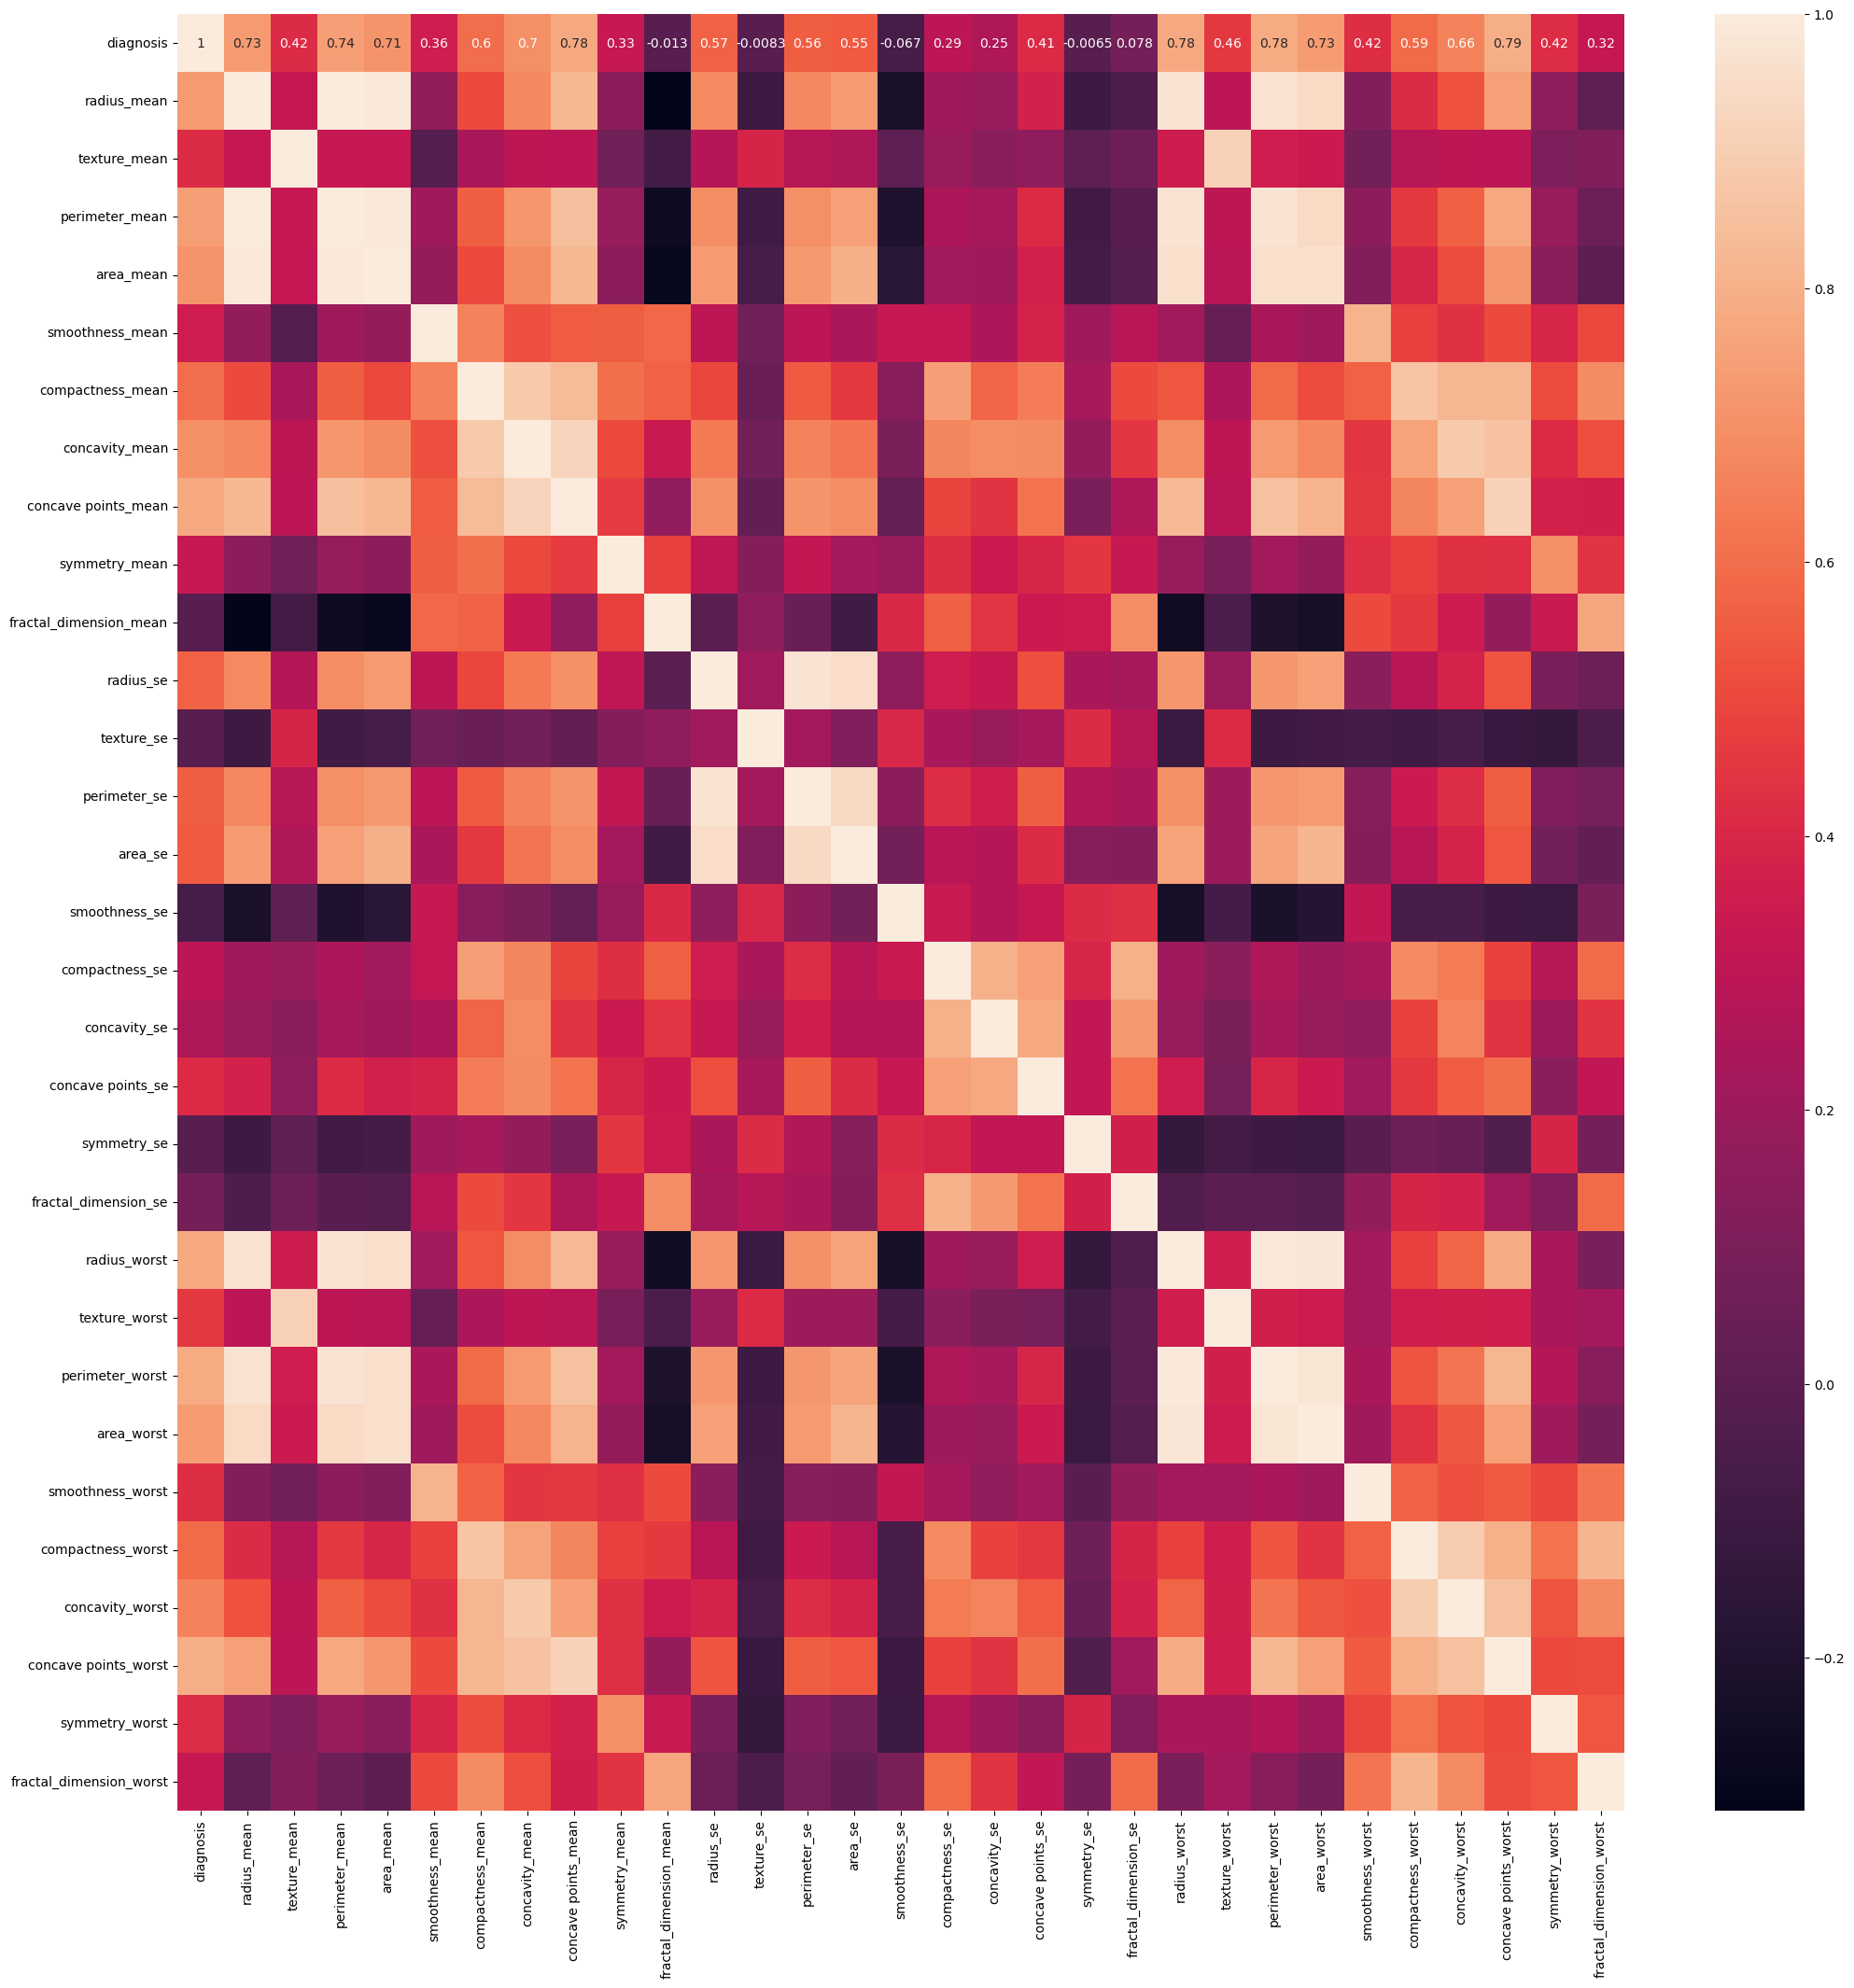

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)

In [18]:
df_high_corr = df[['diagnosis','radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']]

It can be seen that diagnosis is highly correlated with these features (>= 0.5):
<br> radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst

Text(0.5, 0, 'Class')

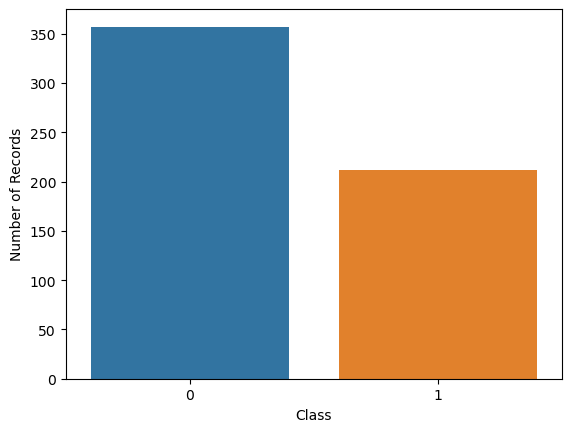

In [19]:
#  show class distribution
sns.countplot(x='diagnosis', data=df)
plt.ylabel('Number of Records')
plt.xlabel('Class')

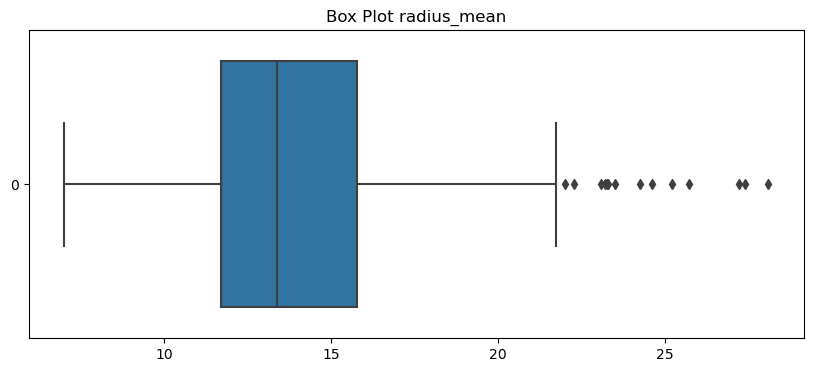

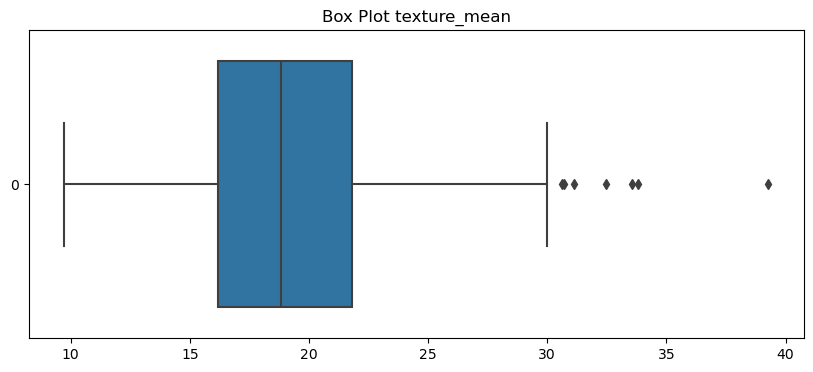

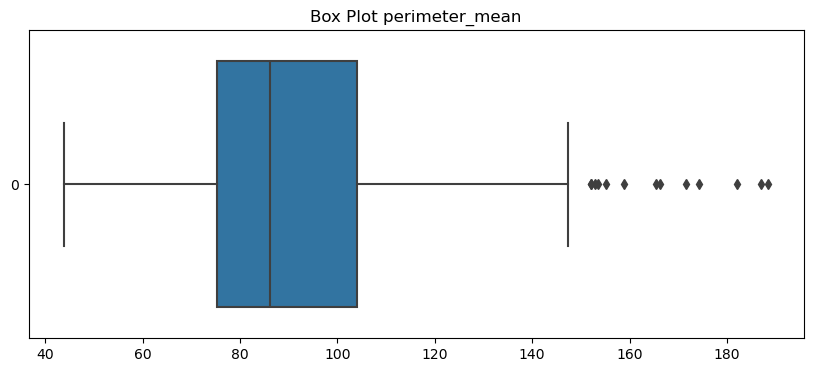

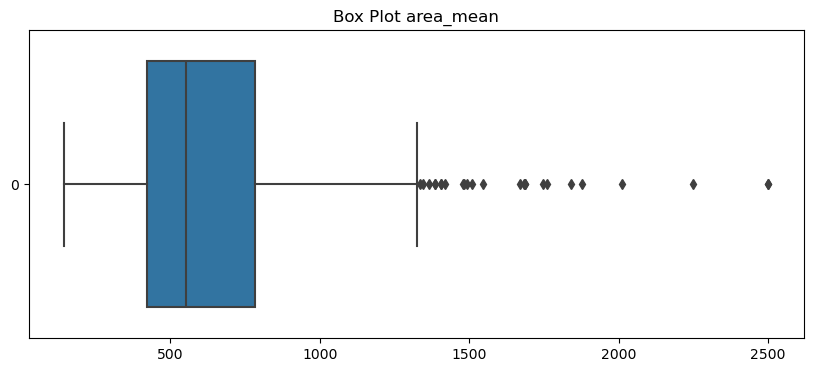

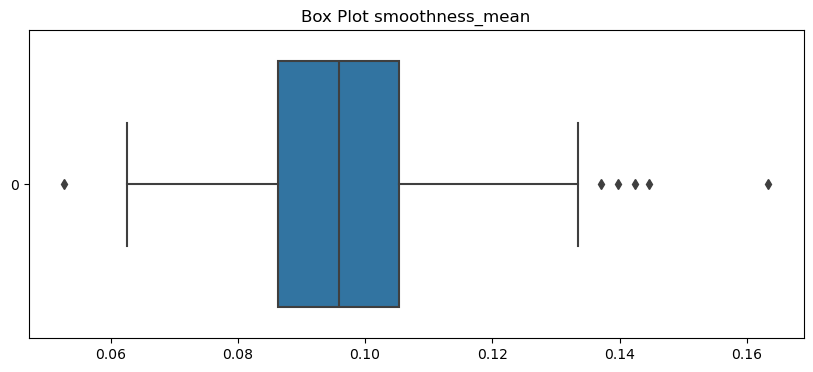

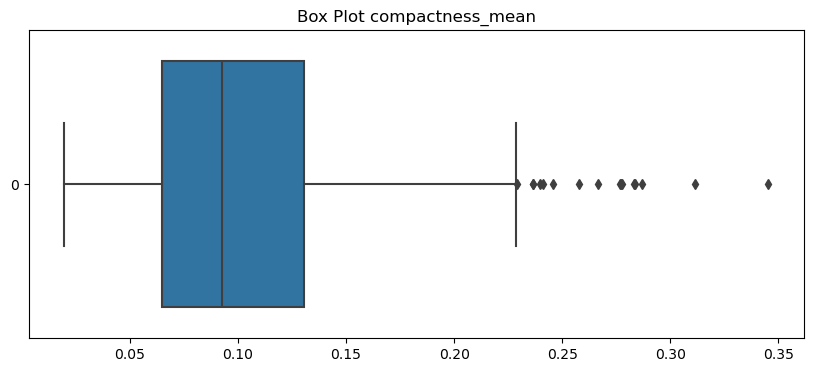

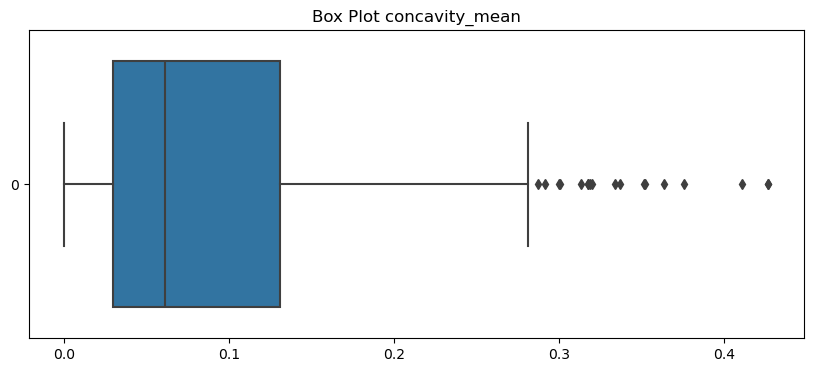

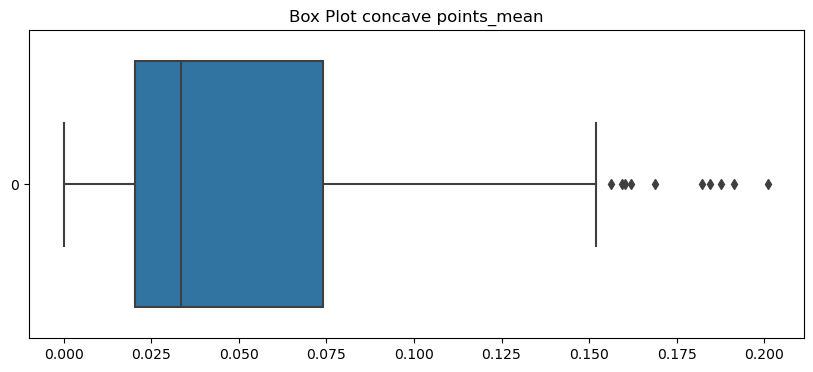

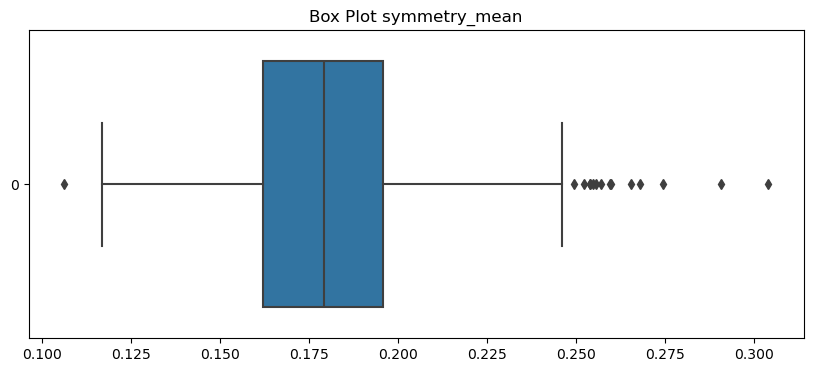

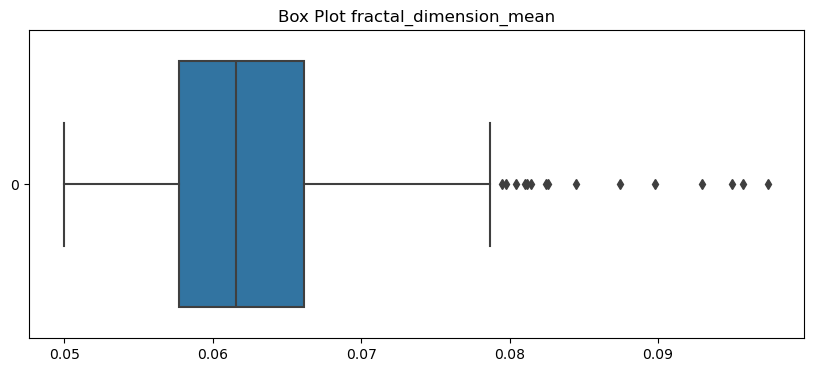

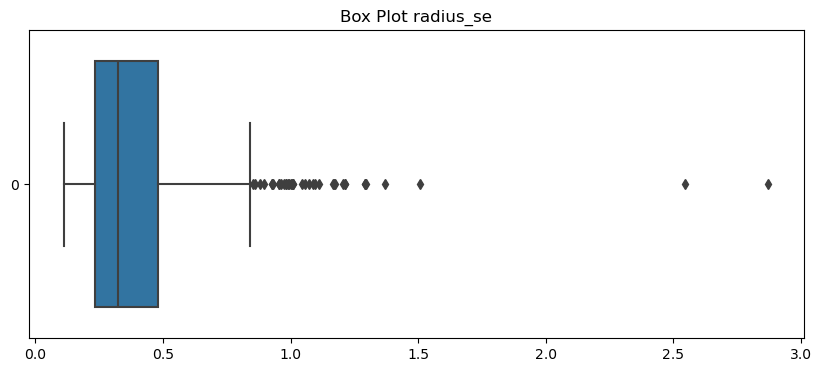

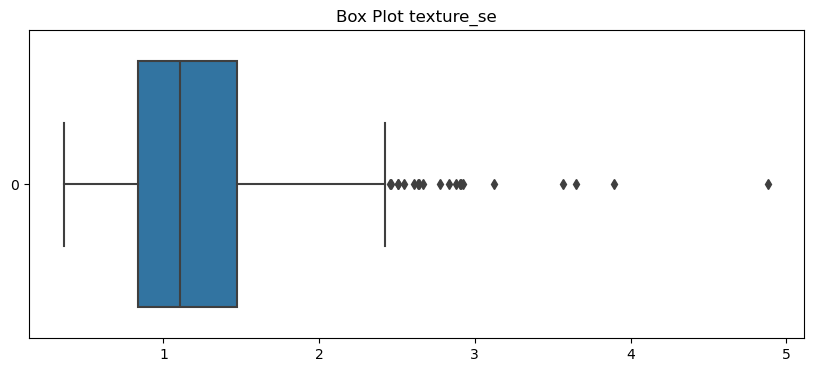

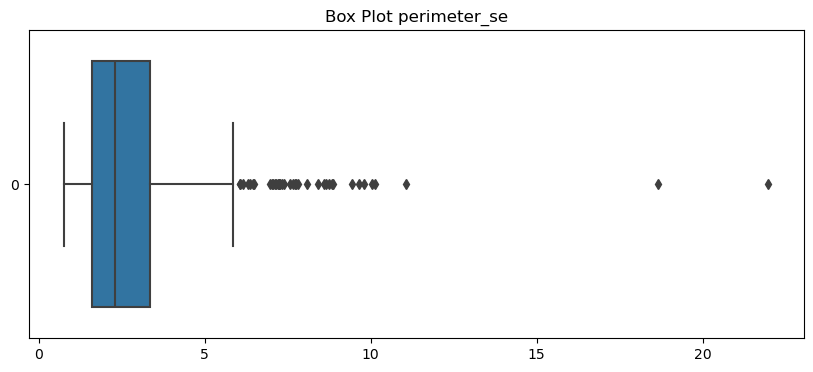

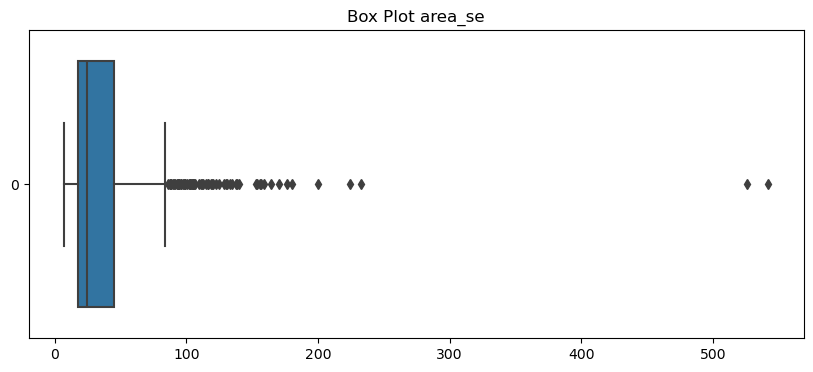

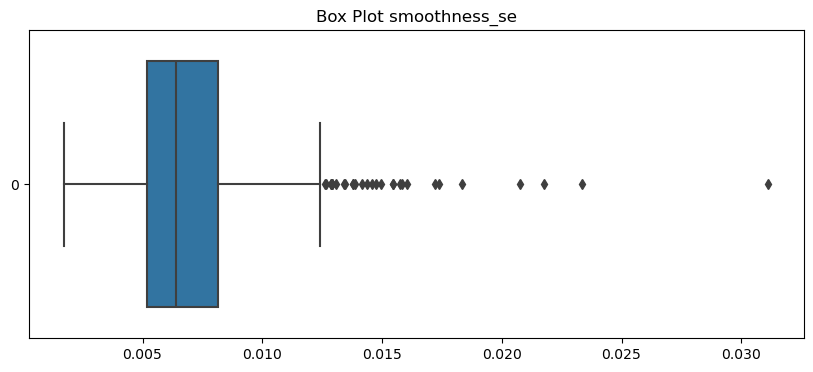

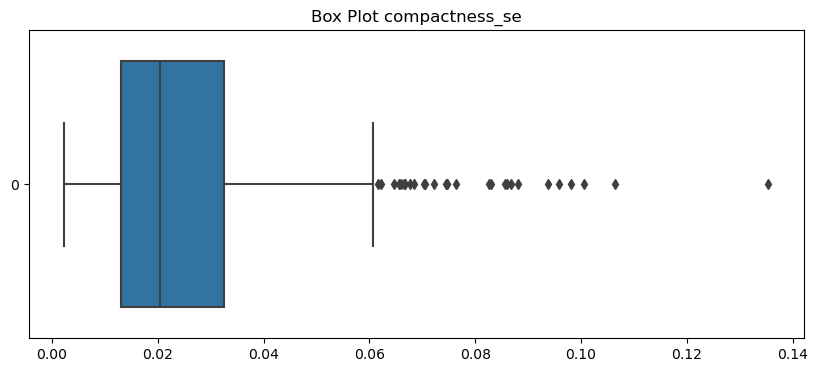

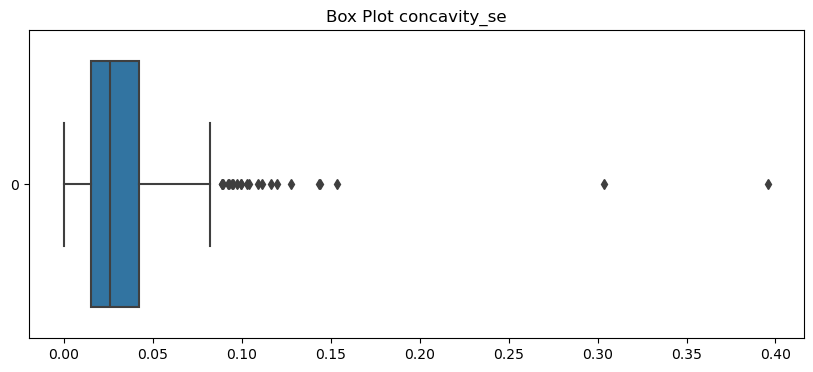

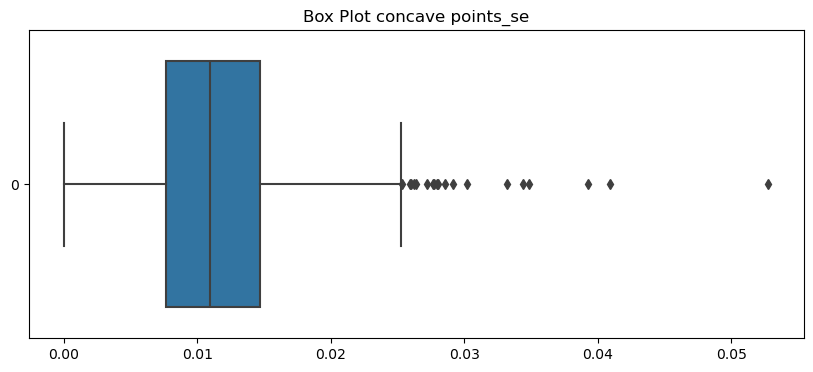

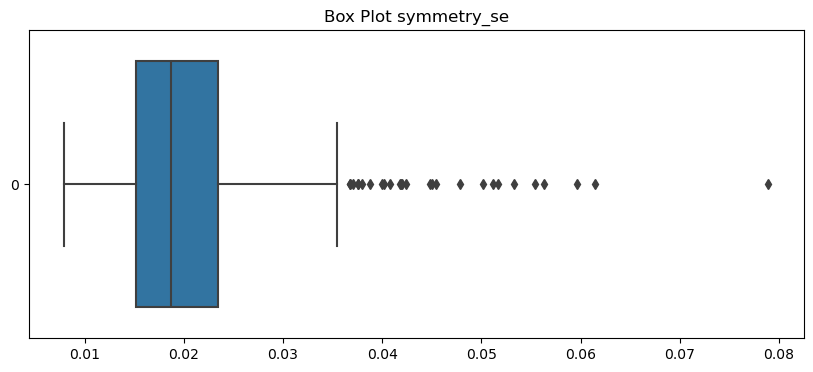

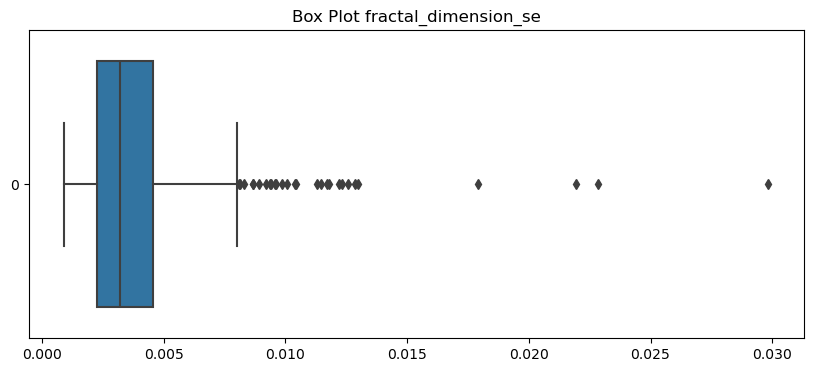

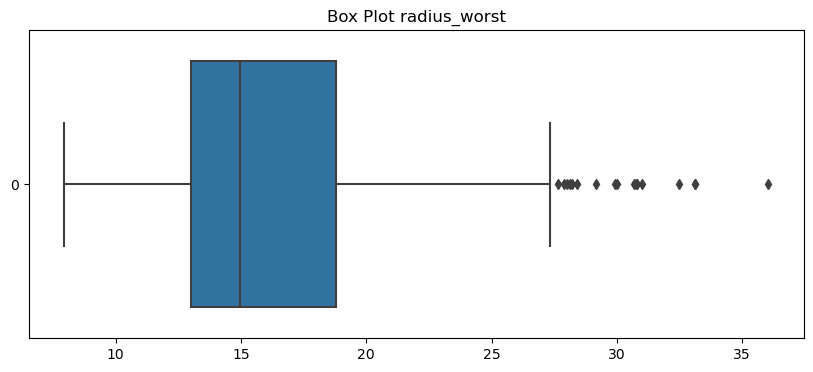

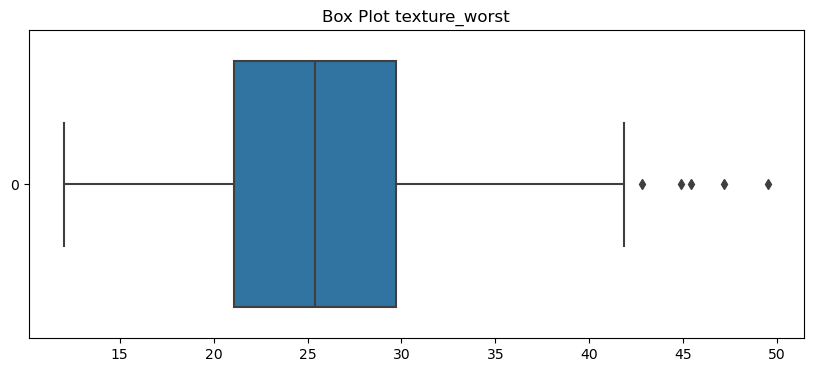

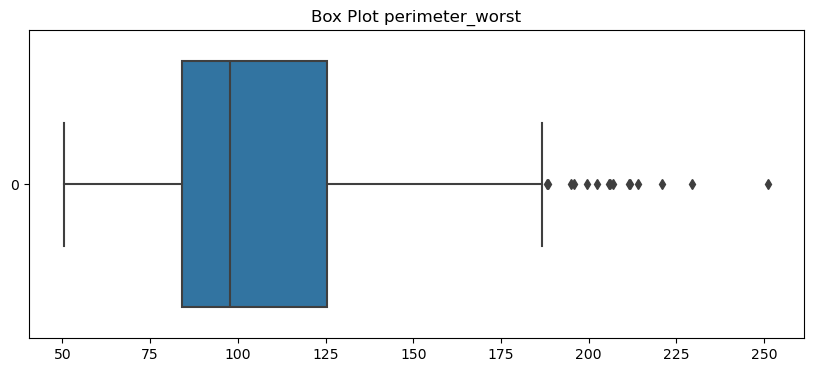

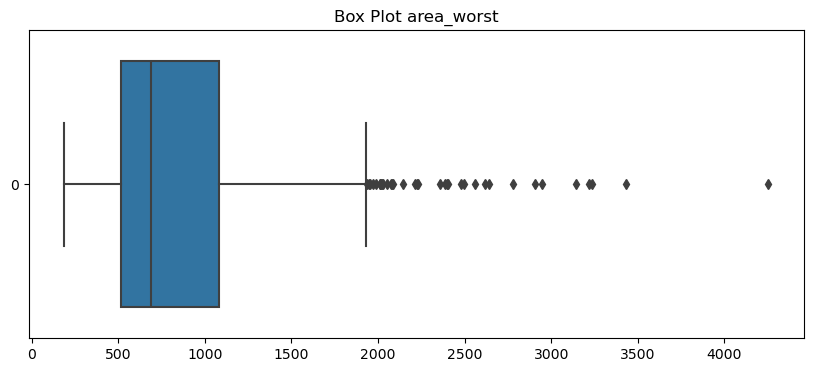

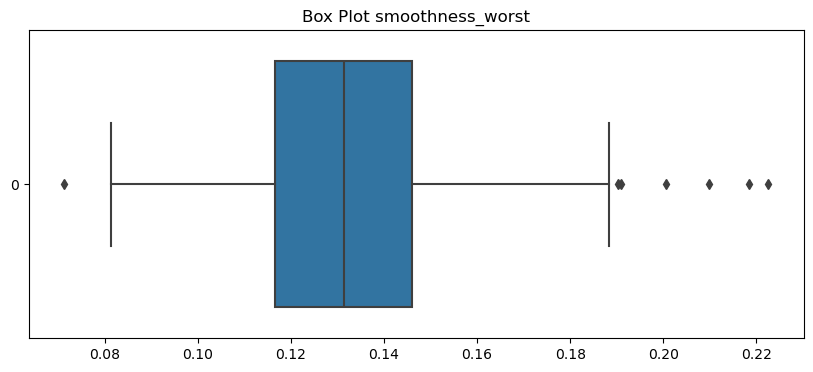

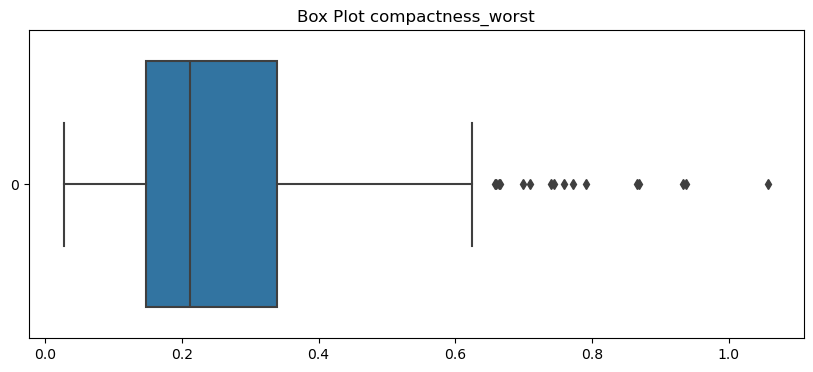

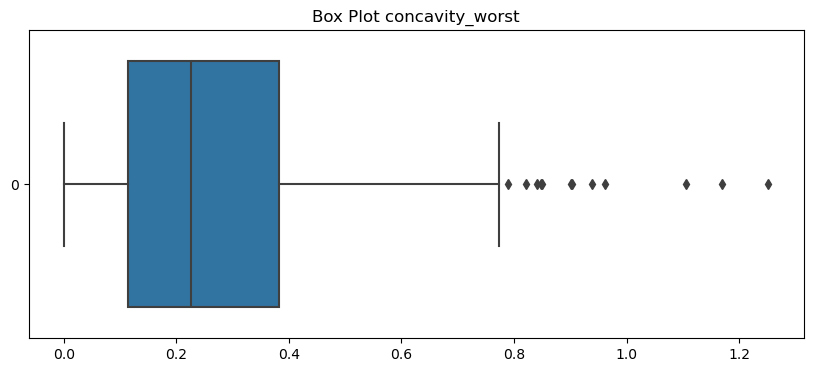

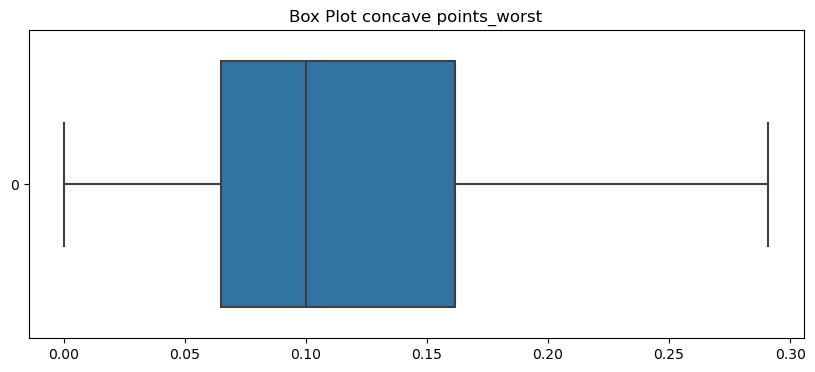

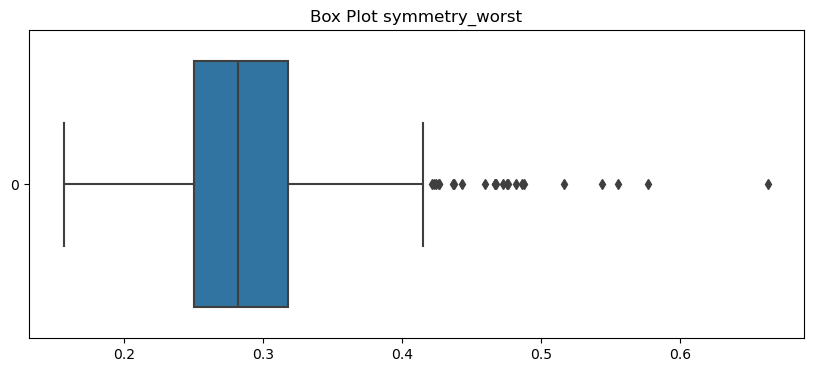

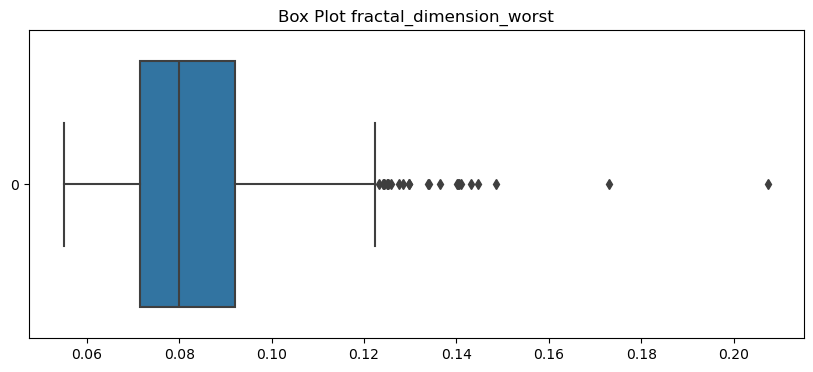

In [20]:
# show outliers in numerical columns

def box_plots(df, column):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot {}".format(column))
    sns.boxplot(df,orient='h')
    plt.show()


for i in list(df.drop(columns=['diagnosis']).columns):
    box_plots(df[i], i)

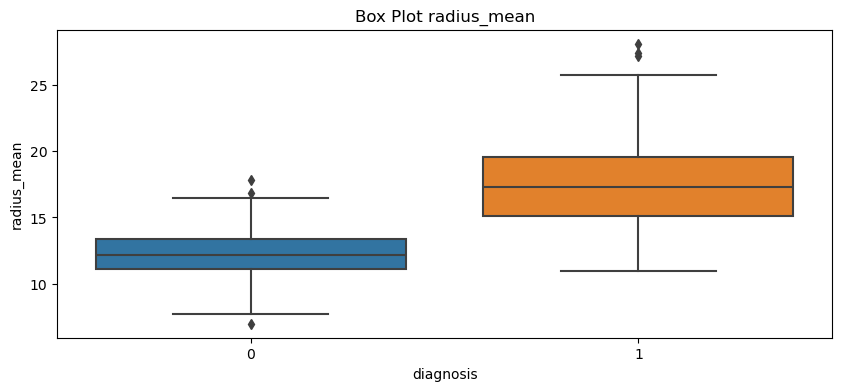

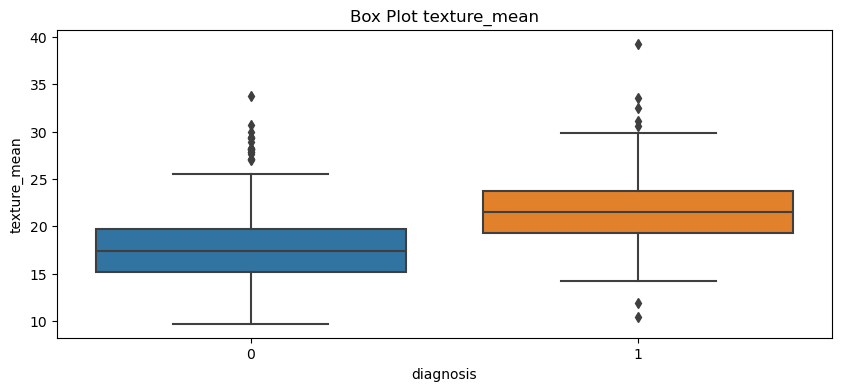

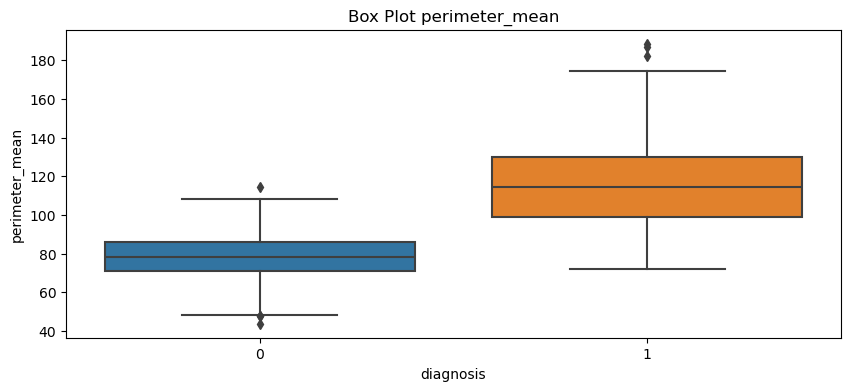

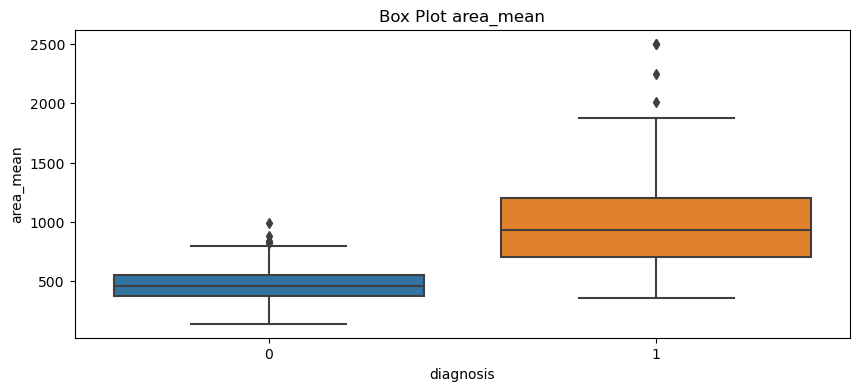

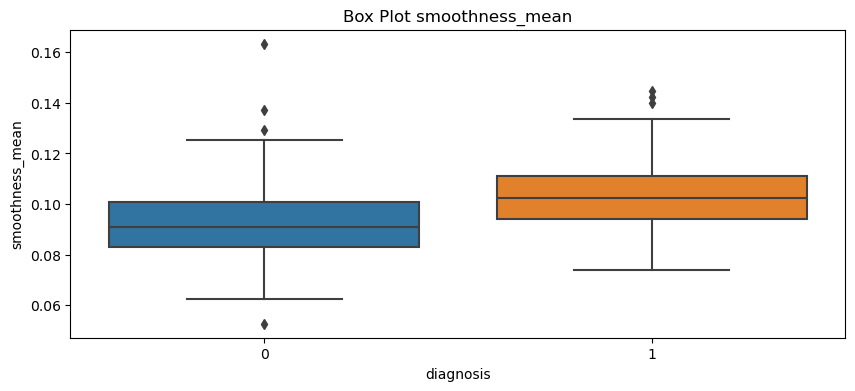

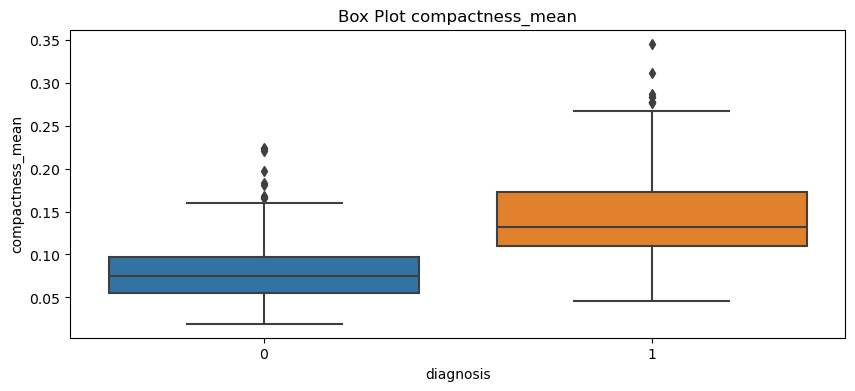

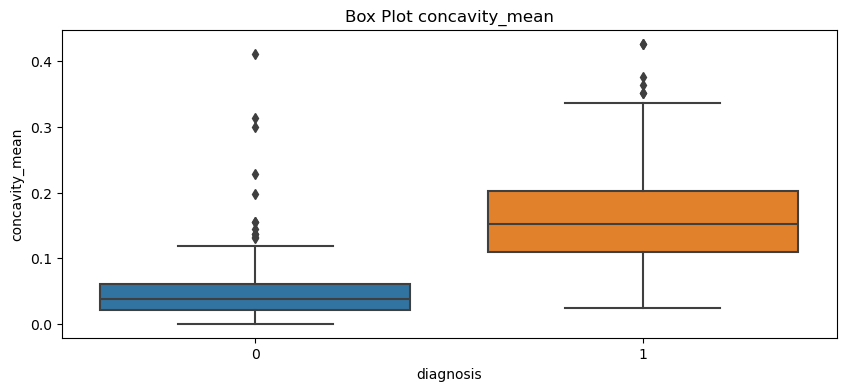

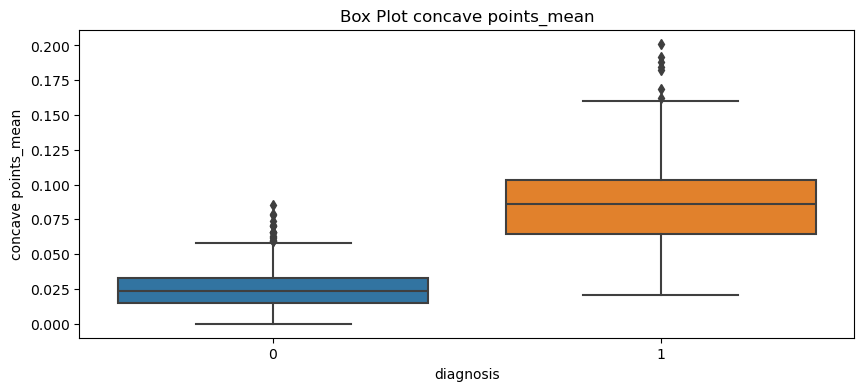

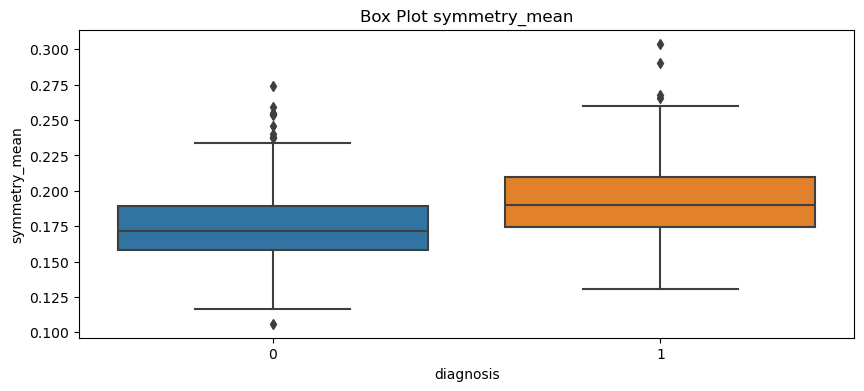

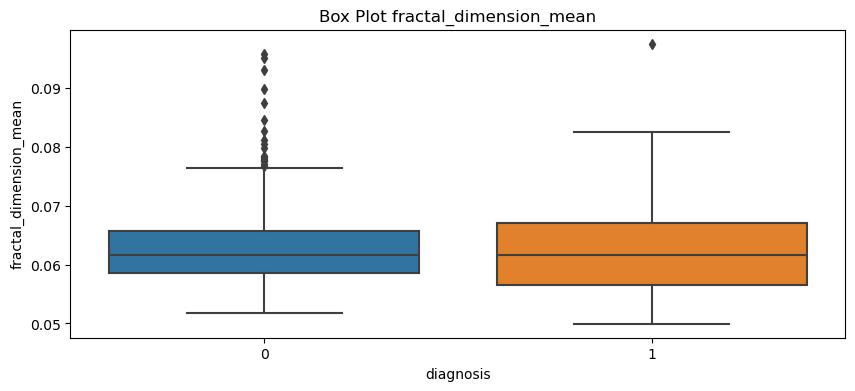

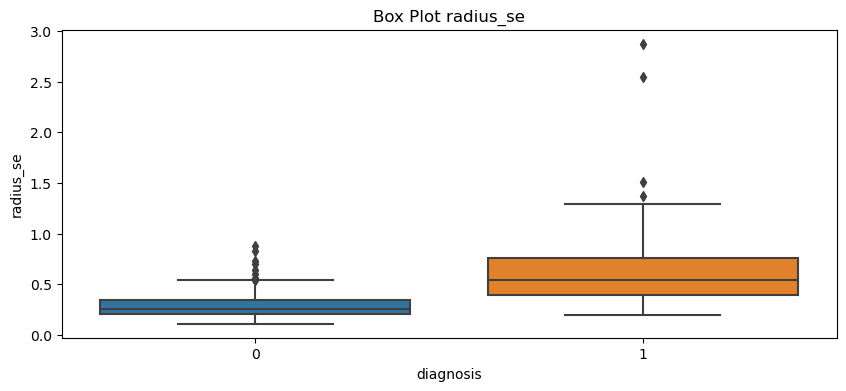

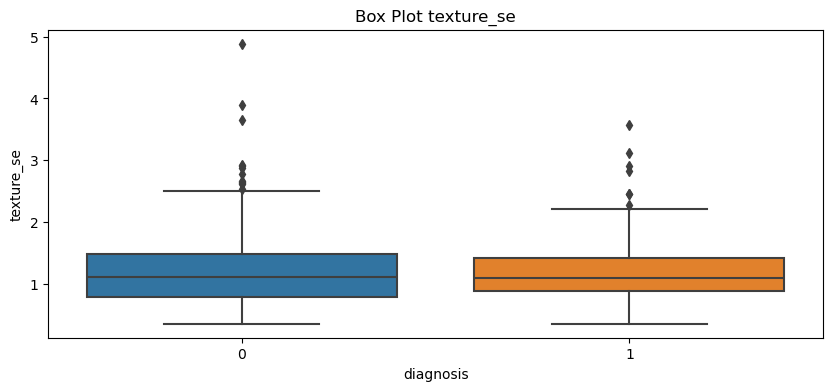

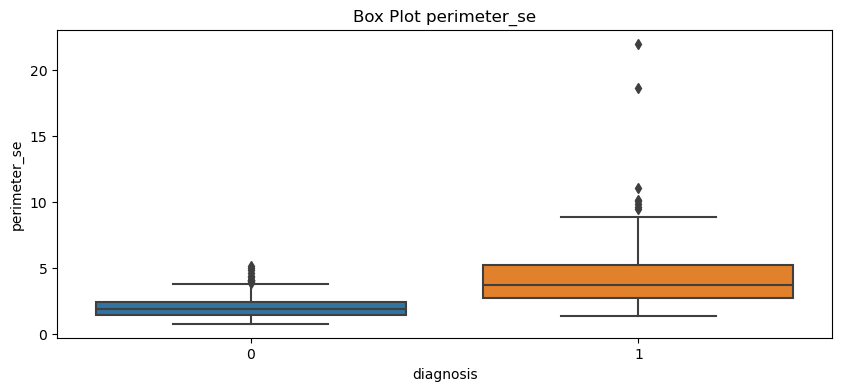

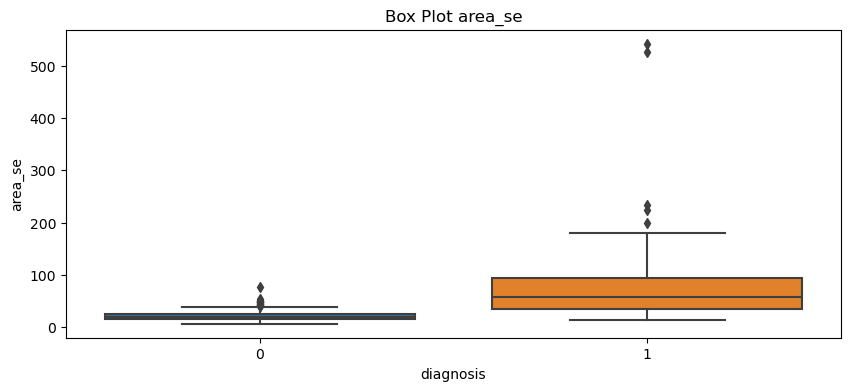

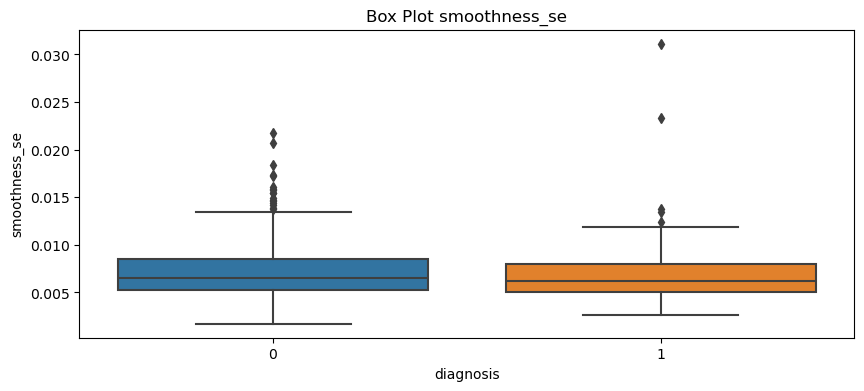

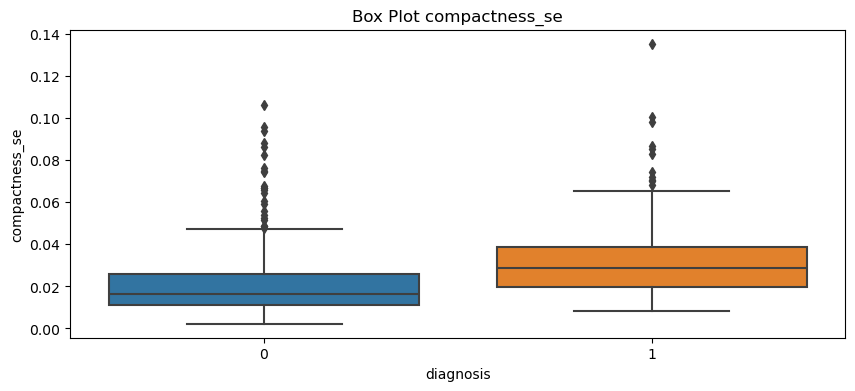

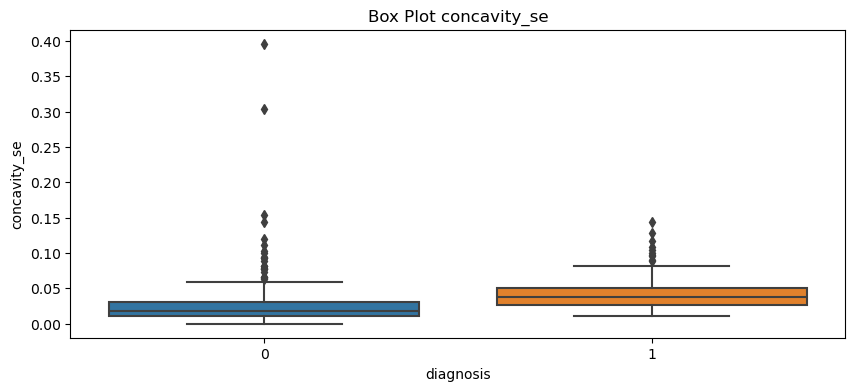

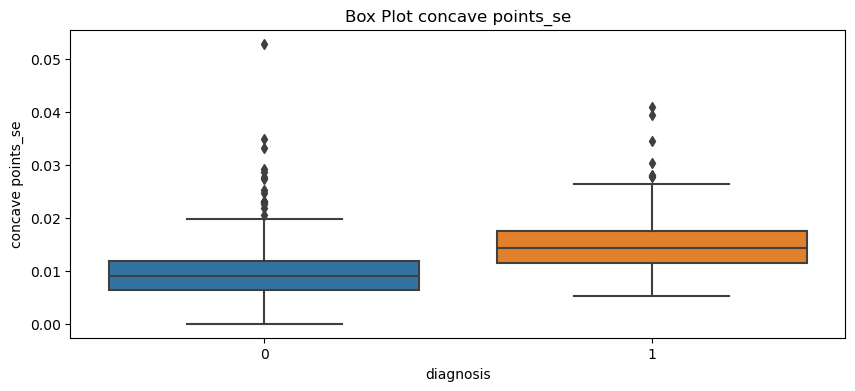

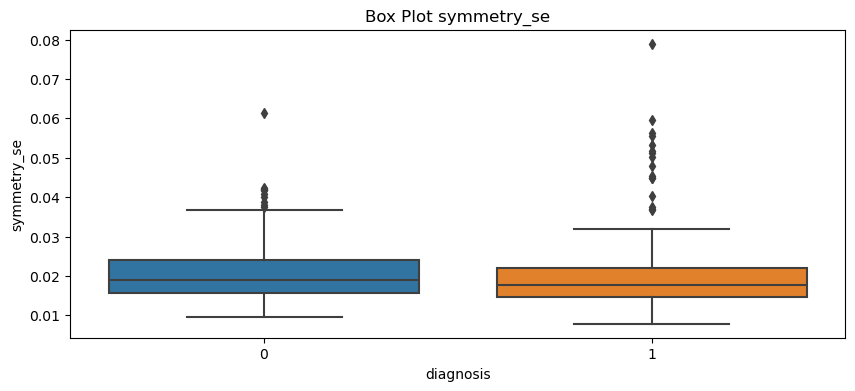

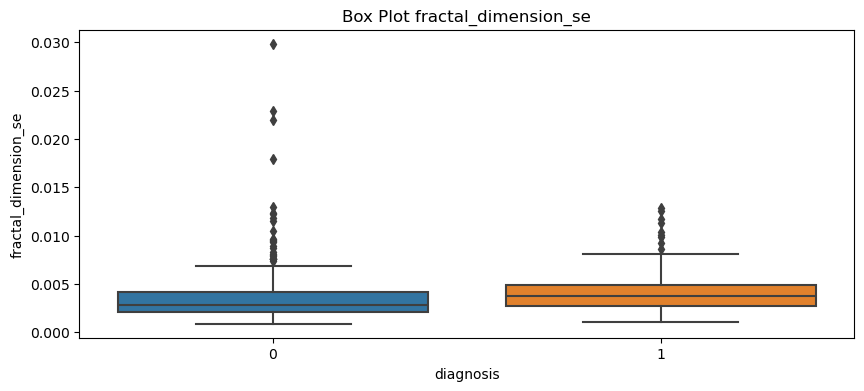

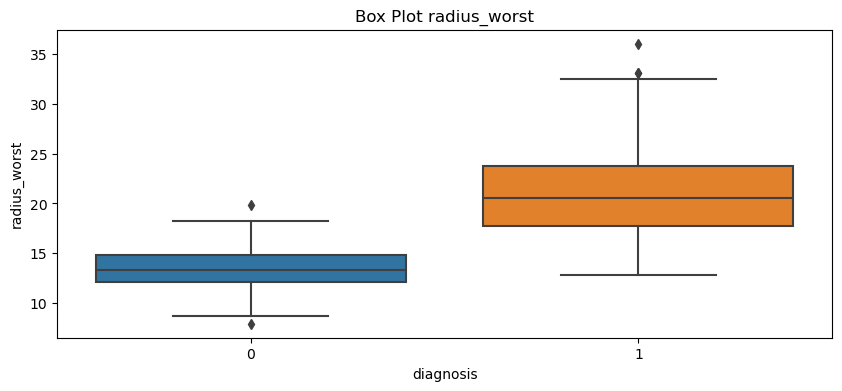

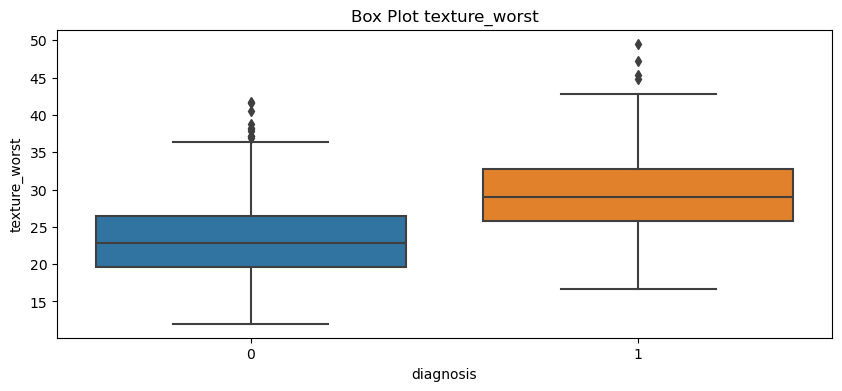

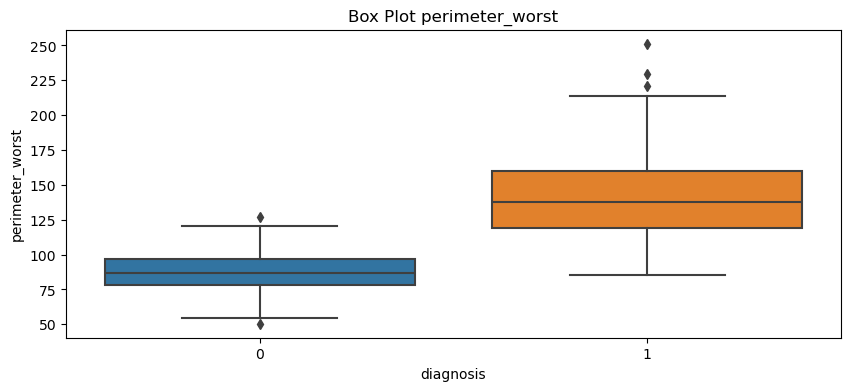

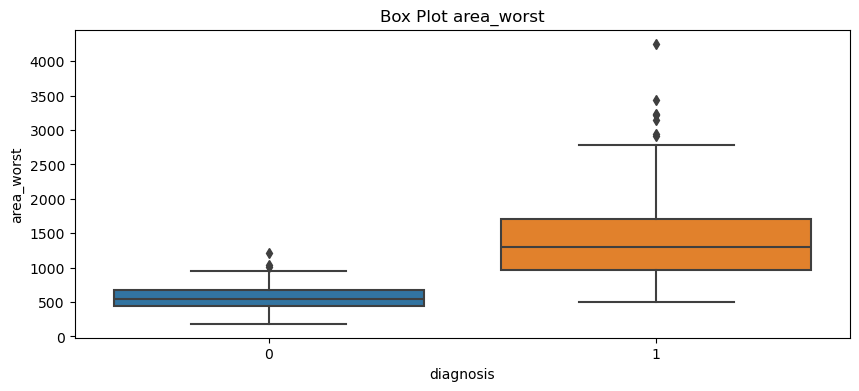

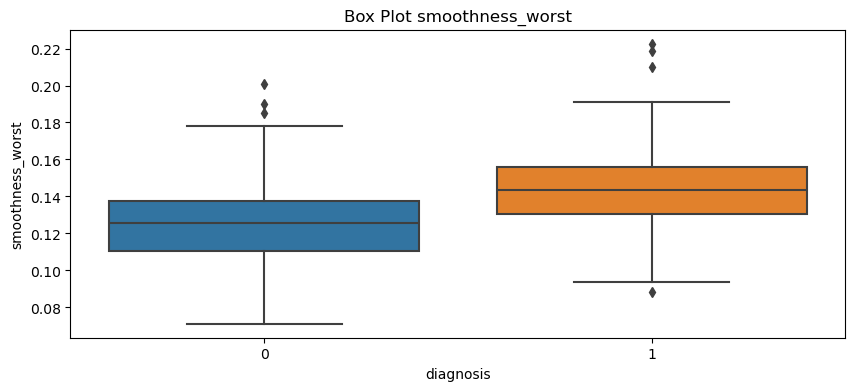

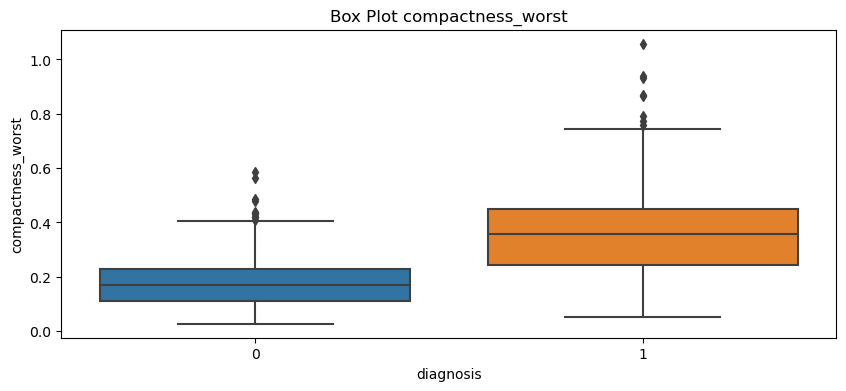

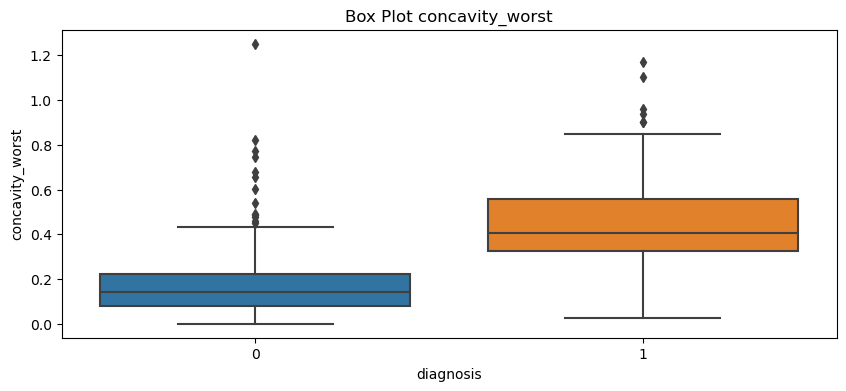

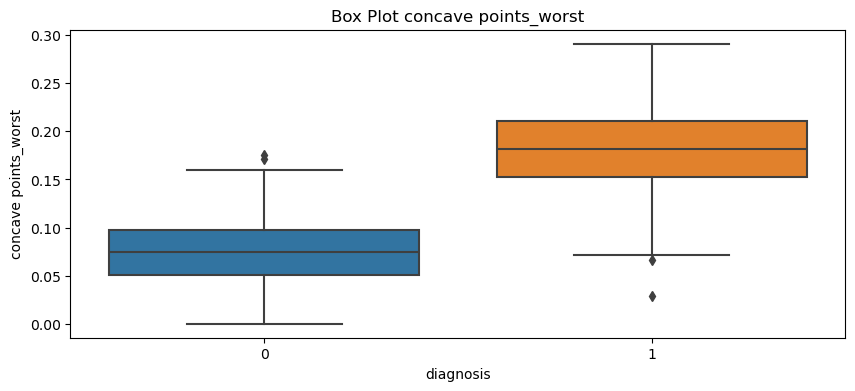

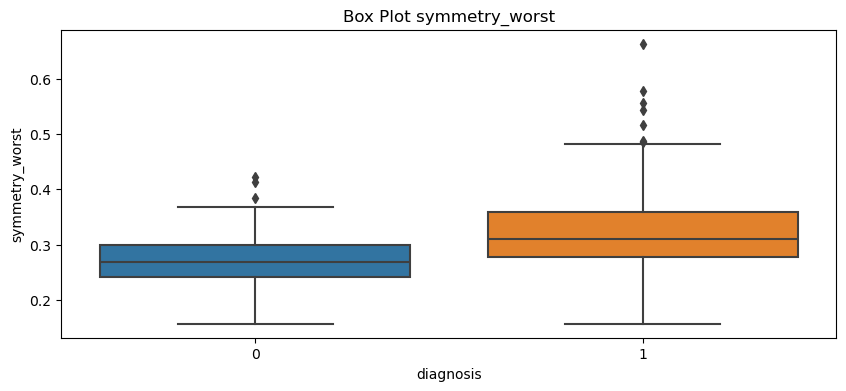

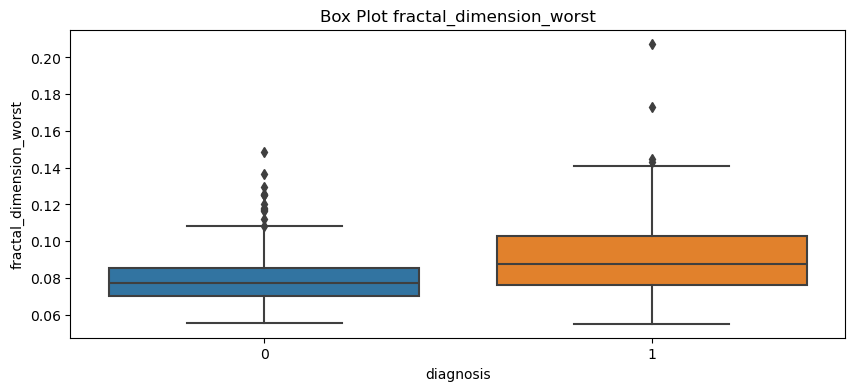

In [21]:
# show outliers in numerical columns and compare between benign and malignant

def box_plots(df, column):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot {}".format(column))
    sns.boxplot(data=df, y=column, x="diagnosis")
    plt.show()


for i in list(df.drop(columns=['diagnosis']).columns):
    box_plots(df, i)

# **PREPARING BEFORE TRAINING**

First try: using all columns
<br>Second try: using highly correlated columns

In [22]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [23]:
#Using a function to determine variables highly correlated

def highly_correlated_cols(dataframe,threshold):
    correlated_cols = set()
    corrmatrix = dataframe.corr()
    for i in range(len(corrmatrix.columns)):
        for j in range(i):
            if abs(corrmatrix.iloc[i,j]) > threshold:
                colname = corrmatrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [24]:
df_high_corr = highly_correlated_cols(df,0.80)

In [25]:
# For all columns
x_train, x_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1),
                                                   df['diagnosis'],
                                                   test_size = 0.25,
                                                   random_state=0)

In [26]:
# For highly correlated columns
# Extract the highly correlated columns from the original DataFrame
df_high_corr_data = df[df_high_corr]

# Split the data into training and testing sets
x_train_hc, x_test_hc, y_train_hc, y_test_hc = train_test_split(df_high_corr_data,
                                                               df['diagnosis'],
                                                               test_size=0.2,
                                                               random_state=0)


C:\Users\DAVID\AppData\Local\Temp\ipykernel_5156\4209033951.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_high_corr_data = df[df_high_corr]


# **TRAINING WITH ALL COLUMNS**

Using Normalizer() instead of MinMaxScaler() based on this article:
<br>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7349542/#B14-healthcare-08-00111

In [27]:
pipe1 = Pipeline([
    ('normalizer', Normalizer()),
    ('model', SVC(random_state=42))
])

modelsvm = pipe1.fit(x_train, y_train)

y_pred_svm = modelsvm.predict(x_test)

In [28]:
pipe2 = Pipeline([
    ('normalizer', Normalizer()),
    ('model', LogisticRegression(random_state=42))
])

modellr = pipe2.fit(x_train, y_train)

y_pred_lr = modellr.predict(x_test)

In [29]:
pipe3 = Pipeline([
    ('normalizer', Normalizer()),
    ('model', KNeighborsClassifier())
])

modelkn = pipe3.fit(x_train, y_train)

y_pred_kn = modelkn.predict(x_test)

In [30]:
pipe4 = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

modelrf = pipe4.fit(x_train, y_train)

y_pred_rf = modelrf.predict(x_test)

In [31]:
pipe5 = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

modeldt = pipe5.fit(x_train, y_train)

y_pred_dt = modeldt.predict(x_test)

In [32]:
pipe6 = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))
])

modelgb = pipe6.fit(x_train, y_train)

y_pred_gb = modelgb.predict(x_test)

In [33]:
print('Accuracy Score SVM: {:.4f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score LR:  {:.4f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Accuracy score KN:  {:.4f}'.format(accuracy_score(y_test, y_pred_kn)))
print('Accuracy Score RF:  {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy Score DT:  {:.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print('Accuracy Score GB:  {:.4f}'.format(accuracy_score(y_test, y_pred_gb)))

Accuracy Score SVM: 0.8811
Accuracy score LR:  0.7622
Accuracy score KN:  0.9371
Accuracy Score RF:  0.9720
Accuracy Score DT:  0.9161
Accuracy Score GB:  0.9720


# **TRAINING WITH HIGHLY CORRELATED COLUMNS**

Using Normalizer() instead of MinMaxScaler() based on this article:
<br>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7349542/#B14-healthcare-08-00111

In [34]:
pipe1_hc = Pipeline([
    ('normalizer', Normalizer()),
    ('model', SVC(random_state=42))
])

modelsvm_hc = pipe1_hc.fit(x_train_hc, y_train_hc)

y_pred_svm_hc = modelsvm_hc.predict(x_test_hc)

In [35]:
pipe2_hc = Pipeline([
    ('normalizer', Normalizer()),
    ('model', LogisticRegression(random_state=42))
])

modellr_hc = pipe2_hc.fit(x_train_hc, y_train_hc)

y_pred_lr_hc = modellr_hc.predict(x_test_hc)

In [36]:
pipe3_hc = Pipeline([
    ('normalizer', Normalizer()),
    ('model', KNeighborsClassifier())
])

modelkn_hc = pipe3_hc.fit(x_train_hc, y_train_hc)

y_pred_kn_hc = modelkn_hc.predict(x_test_hc)

In [37]:
pipe4_hc = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

modelrf_hc = pipe4_hc.fit(x_train_hc, y_train_hc)

y_pred_rf_hc = modelrf_hc.predict(x_test_hc)

In [38]:
pipe5_hc = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

modeldt_hc = pipe5_hc.fit(x_train_hc, y_train_hc)

y_pred_dt_hc = modeldt_hc.predict(x_test_hc)

In [39]:
pipe6_hc = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))
])

modelgb_hc = pipe6_hc.fit(x_train_hc, y_train_hc)

y_pred_gb_hc = modelgb_hc.predict(x_test_hc)

In [40]:
print('Accuracy Score SVM: {:.4f}'.format(accuracy_score(y_test_hc, y_pred_svm_hc)))
print('Accuracy score LR:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_lr_hc)))
print('Accuracy score KN:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_kn_hc)))
print('Accuracy Score RF:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_rf_hc)))
print('Accuracy Score DT:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_dt_hc)))
print('Accuracy Score GB:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_gb_hc)))

Accuracy Score SVM: 0.8684
Accuracy score LR:  0.7193
Accuracy score KN:  0.9386
Accuracy Score RF:  0.9561
Accuracy Score DT:  0.9474
Accuracy Score GB:  0.9561


# **IMPROVING RANDOM FOREST WITH ALL FEATURES**

In [41]:
## initializing the RandomForestClassifier object
rfc = RandomForestClassifier(random_state=0)

# defining hyperparameters to search over during hyperparameter tuning process
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [42]:
rfc_cv = RandomizedSearchCV(estimator = rfc,  param_distributions = params_grid, error_score='raise', verbose = 0, cv = 5, n_iter = 100)

rfc_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [43]:
rfc_cv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

In [44]:
# **RETRAINING WITH BEST MODEL**

best_rf = RandomForestClassifier(
    n_estimators =  200,
    min_samples_split = 5,
    min_samples_leaf =  1,
    max_features =  'sqrt',
    max_depth = 90,
    bootstrap =  True
    )

In [45]:
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=200)

In [46]:
y_pred_best_rf = best_rf.predict(x_test)

In [47]:
accuracy_score(y_test, y_pred_best_rf) 

# There is a drop in accuracy, certainly no improvement after we use RandomGridSearchCV
## Let us try using other algorithms 

0.972027972027972

In [48]:
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



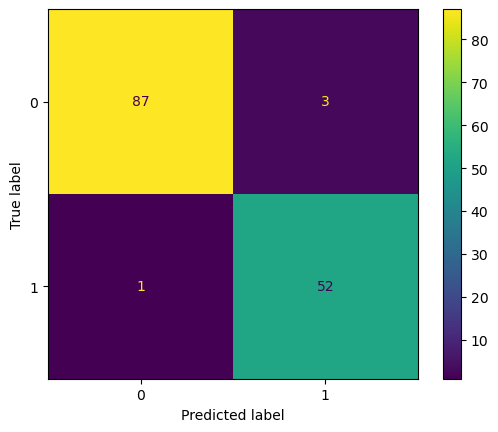

In [49]:
cm = confusion_matrix(y_test, y_pred_best_rf, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_rf.classes_)
disp.plot()

After trying different grids RandomForestClassifier algorithm after hyperparameter tunning maintained same accuracy. So i decided tunning with another algorithm with the second best accuracy score GradientBoostingClassifier.

## TRYING WITH GradientBoostingClassifier WITH ALL FEATURES


In [50]:
# Create the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameters to search over
params_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2, 0.5],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the individual base learners
}


In [51]:
# Create the RandomizedSearchCV object
gb_cv = RandomizedSearchCV(estimator=gb, param_distributions=params_grid, cv=5, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the data
gb_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42)

In [52]:
# Print the best hyperparameters
print("Best Hyperparameters:", gb_cv.best_params_)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}


In [53]:
# **RETRAINING WITH BEST MODEL**

best_gb = GradientBoostingClassifier(
    subsample = 1.0, 
    n_estimators = 300, 
    min_samples_split = 2, 
    min_samples_leaf = 2, 
    max_depth = 3, 
    learning_rate = 0.1
    )

In [54]:
best_gb.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=2, n_estimators=300)

In [55]:
y_pred_best_gb = best_gb.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred_best_gb) 

# It's seem like there is no improvement after we use RandomGridSearchCV for GradientBoostingClassifier

0.965034965034965

In [57]:
print(classification_report(y_test, y_pred_best_gb))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



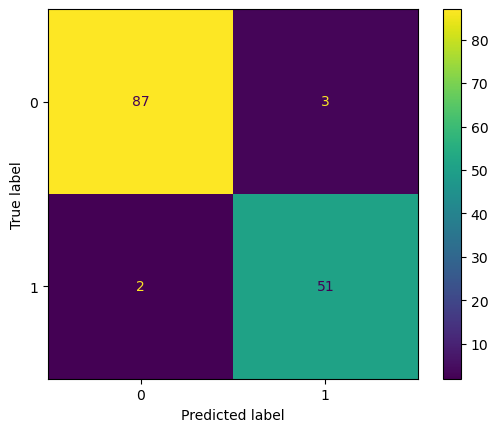

In [58]:
cm = confusion_matrix(y_test, y_pred_best_gb, labels=best_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_gb.classes_)
disp.plot()

## CONCLUSION

RandomForestClassifier and GradientBoostingClassifier seems to perform similarly in terms of predictive accuracy and 
identical performance metrics. The RandomForestClassifier appears to have a slightly higher recall for class 1 (0.98 compared to 0.96 in the GradientBoostingClassifier). This means that the RandomForest model is slightly better in terms of distinguishing between positive and negative instances of the target classes. 

In choosing which of the 2 model is best, may  depend on individuals specific priorities and requirementsother.





, 


Contact Details:

- WhatsApp : +2347065093865
- Email : davoazorji1@gmail.com